# MNE examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne
print(mne.__version__)

0.23.4


## Data loading

In [2]:
filename = "test.edf"
raw = mne.io.read_raw_edf(filename)

Extracting EDF parameters from /home/frederic/Projects/mne-examples/test.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 30 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2008-10-14 20:48:12 UTC
 nchan: 30
 projs: []
 sfreq: 250.0 Hz
>


Individual attributes of `raw.info` can be accessed by `raw.info['attribute']`

In [4]:
print("Channels: ", raw.info['ch_names'])
print(f"\nFilter settings (high-pass - low-pass): {raw.info['highpass']:.2f} - {raw.info['lowpass']:.2f} Hz ")
print(f"\nSampling frequency: {raw.info['sfreq']:.2f} Hz")

Channels:  ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'AFz', 'AF3', 'AF4', 'FC3', 'FC4', 'FT9', 'FT10', 'TP9', 'TP10', 'CP5', 'CP6']

Filter settings (high-pass - low-pass): 0.00 - 125.00 Hz 

Sampling frequency: 250.00 Hz


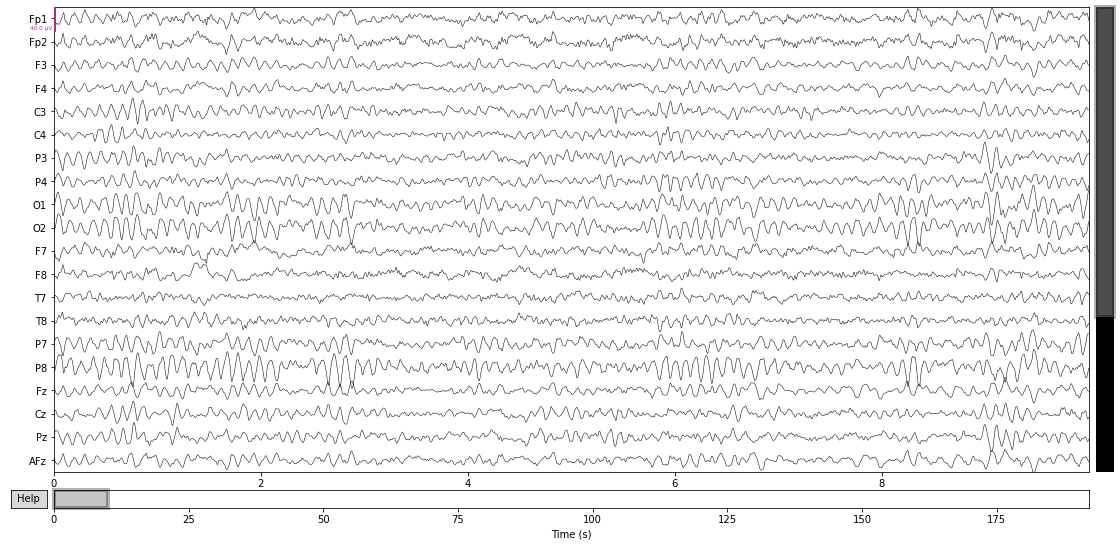

In [5]:
_ = raw.plot() # return _ to avoid double graphical output

### Define a montage to use topographic plots

In [6]:
raw = raw.set_montage('standard_1020')

### Plot power spectral density of all electrodes

Effective window size : 8.192 (s)


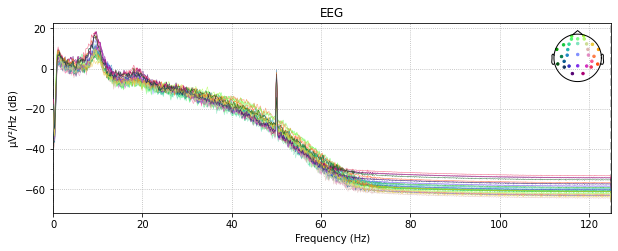

In [7]:
_ = raw.plot_psd()

### Define frequency bands
Store frequency band as Python dictionary.

In [8]:
freq_bands = {
    'delta': (1,3.5),
    'theta': (4,7.5),
    'alpha': (8,12.5),
    'beta': (13,30),
}

### Plot time-averaged band power

Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)


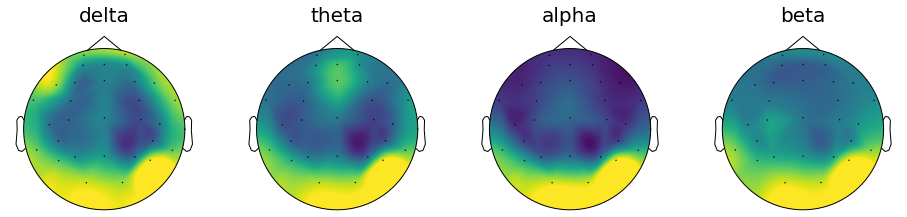

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(16,4))
for i, freq in enumerate(freq_bands):
    f_lo, f_hi = freq_bands[freq]
    show_ = False if i < len(freq_bands)-1 else True   
    ax[i].set_title(f"{freq:s}", fontsize=20)
    # power spectral density (PSD)
    psd, freqs = mne.time_frequency.psd_welch(raw, fmin=f_lo, fmax=f_hi, n_fft = 2048)
    # average PSD across time (axis=1) and plot
    mne.viz.plot_topomap(psd.mean(axis=1), raw.info, cmap=plt.cm.viridis, contours=0, axes=ax[i], show=show_)
plt.show()
